# Лабораторная работа №8.1 "Тепловое излучение"

Исследуется излучение модели АЧТ; тел, отличающихся по излучению от АЧТ. Определяется постоянная Планка и Стефана-Больцмана из анализа излучения раскаленного тела.

### Изучение работы пирометра

В ходе измерения температур на пирометре и термопаре и их сравнения было выяснено, что у пирометра есть **смещение +120 к показаниям пирометра**.

### Измерение яркостной температуры разных тел

Кольца, насаженные на трубку, имели разную _яркостную температуру_ при том, что их _термодинамическая температура_ была одинаковой. Это связано с различиями коэффициентов испускания для двух колец. Видимо, они были изготовлены из разных материалов.

### Проверка закона Стефана-Больцмана

По измерениям температуры лампы накаливания и ее потребляемой мощности можно проверить закон Стефана-Больцмана. Для этого нужно определить угловой коэффициент (**ожидаем 4**) графика:
$$
\ln W = \ln (\varepsilon_T B) + n \ln T
$$

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [211]:
def paint_dots(*args, **kwargs):
    fig, ax = plt.subplots()
    for i in args:
        x_data, y_data = i['x'], i['y']
        
        if('isScatter' in i):
            is_scatter = i['isScatter']
        else:
            is_scatter = True
        
        if('label' in i):
            label = i['label']
        else:
            label = 'Graph'
        
        if('x_label' in i):
            x_label = i['x_label']
        else:
            x_label = r'$V$, В'
        
        if('y_label' in i):
            y_label = i['y_label']
        else:
            y_label = r'$I$, мА'
            
        if('y_error' in i):
            is_scatter = False
            ax.errorbar(x_data, y_data, yerr=i['y_error'], label=label, fmt='o')
        else:
            if is_scatter:
                ax.scatter(x_data, y_data, label=label)
            else :
                ax.plot(x_data, y_data, label=label)
            
    if('x_lim' in kwargs):
        ax.set_xlim(kwargs['x_lim'])
    if('y_lim' in kwargs):
        ax.set_ylim(kwargs['y_lim'])
    if('scientific' in kwargs):
        if(kwargs['scientific']):
            import matplotlib.ticker as mtick
            ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
    
    ax.grid()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    # Ставим title
    if('title' in kwargs):
        ax.set_title(kwargs['title'])
    else:
        ax.set_title('ВАХ')
    
    # Сохраняем график
    if('filename' in kwargs):
        fig.savefig(kwargs['filename'])
    else:
        fig.savefig('out1.pdf')

In [248]:
df = pd.read_csv('raw_data_old.csv', delimiter=';')
# С учетом замечаний из п.1, добавим всем темепературам оффсет
df['T'] += 120 + 273
# Здесь U [В], I [А], T [˚C]
df['W'] = df.U * df.I
#df = df.drop([5, 6, 8, 4, 3, 1, 2])
df

,U,I,T,W
0,28.5,0.817,1344,23.2845
1,36.6,0.918,1498,33.5988
2,45.0,1.012,1609,45.5400
3,53.1,1.100,1786,58.4100
4,67.2,1.244,1745,83.5968
5,75.5,1.320,1929,99.6600
6,82.6,1.388,2024,114.6488
7,91.3,1.465,2157,133.7545
8,100.2,1.544,2259,154.7088


In [249]:
df_w = pd.read_csv('data_W.csv', delimiter=';')

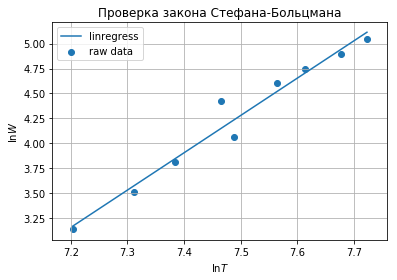

In [250]:
x, y = np.log(df['T']), np.log(df['W'])

slope, intercept, r_value, p_value, std_err = linregress(x, y)
f = lambda x: slope*x + intercept

x_linreg = np.linspace(min(x), max(x), 1000)

paint_dots(
    {'x': x, 'y': y, 'label': 'raw data'},
    {'x': x_linreg, 'y': f(x_linreg), 'label': 'linregress', 'isScatter': False, 
     'x_label': r'$\ln T$', 'y_label': r'$\ln W$'},
    title='Проверка закона Стефана-Больцмана', filename='stefan.pdf'
)

In [251]:
slope

3.73839039960485

In [252]:
intercept

-23.757255735654663

Закон Стефана-Больцмана выполняется.

Из пересечения с осью находим $\varepsilon_T S \sigma = 1.31 \cdot 10^{-13}$.

Для каждой температуры выше 1700 К найдем таким способом $\sigma$:
$$
\sigma = \dfrac{W}{\varepsilon_T S T^4}
$$

In [253]:
S = 5 * 10**(-4)

In [254]:
def e_T(T):
    if T < 800:
        return 0.067
    elif 800 <= T < 900:
        return 0.081
    elif 900 <= T < 1000:
        return 0.105
    elif 1000 <= T < 1100:
        return 0.119
    elif 1100 <= T < 1200:
        return 0.133
    elif 1200 <= T < 1300:
        return 0.144
    elif 1300 <= T < 1400:
        return 0.164
    elif 1400 <= T < 1500:
        return 0.179
    elif 1500 <= T < 1600:
        return 0.195
    elif 1600 <= T < 1700:
        return 0.209
    elif 1700 <= T < 1800:
        return 0.223
    elif 1800 <= T < 1900:
        return 0.236
    elif 1900 <= T < 2000:
        return 0.249
    else:
        return 1

In [255]:
sigma = []
for i in range(len(df)):
    W, T = df['W'][i], df['T'][i]
    sigma.append(W/e_T(T)/S/T**4)

In [256]:
from decimal import Decimal
sigma_res = np.mean(sigma)
sigma_std = np.std(sigma) / len(sigma)
print(r'  Полученная постоянная: {0:.2E} ± {1:.2E}'.format(Decimal(sigma_res), Decimal(sigma_std)))

  Полученная постоянная: 5.05E-8 ± 3.19E-9


Получили $\sigma = (5.05 \pm 0.3) \cdot 10^{-8}$ Вт $\cdot$ м$^{-2}$ K$^{-4}$

Табличное значение $\sigma = 5.67 \cdot 10^{-8}$ Вт $\cdot$ м$^{-2}$ K$^{-4}$.

Эксперимент неплохо сходится с табличными данными.

### Постоянная Планка

Постоянную Планка получим из формулы:
$$
h = \sqrt[3]{\dfrac{2 \pi^5 k_\text{Б}^4}{15 c^2 \sigma}}
$$

$$
h = (6.88 \pm 0.14) \cdot 10^{-34} \text{ Дж} \cdot \text{с}
$$
Табличное: $h = 6.63 \cdot 10^{-34} \text{ Дж} \cdot \text{с}$

Эксперимент неплохо сошелся с ожидаемой величиной.